In [1]:
# ⁠Raw data pre-processing

# Data Splitting
#   - Filtering
#   - Window Segmentation
# •⁠  ⁠Features for classification
#   - Hand-crafted features

# Automatically learned features (deep features)
# •⁠  ⁠Feature dimensionality reduction and feature selection
#   - Feature dimensionality reduction
#   - Feature selection (FS)
# •⁠  ⁠Classification algorithms
#   - Conventional classification algorithms
#   - Deep learning algorithms

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
one = pd.read_csv('S1.csv')
two = pd.read_csv('S2.csv')
three = pd.read_csv('S3.csv')
four = pd.read_csv('S4.csv')

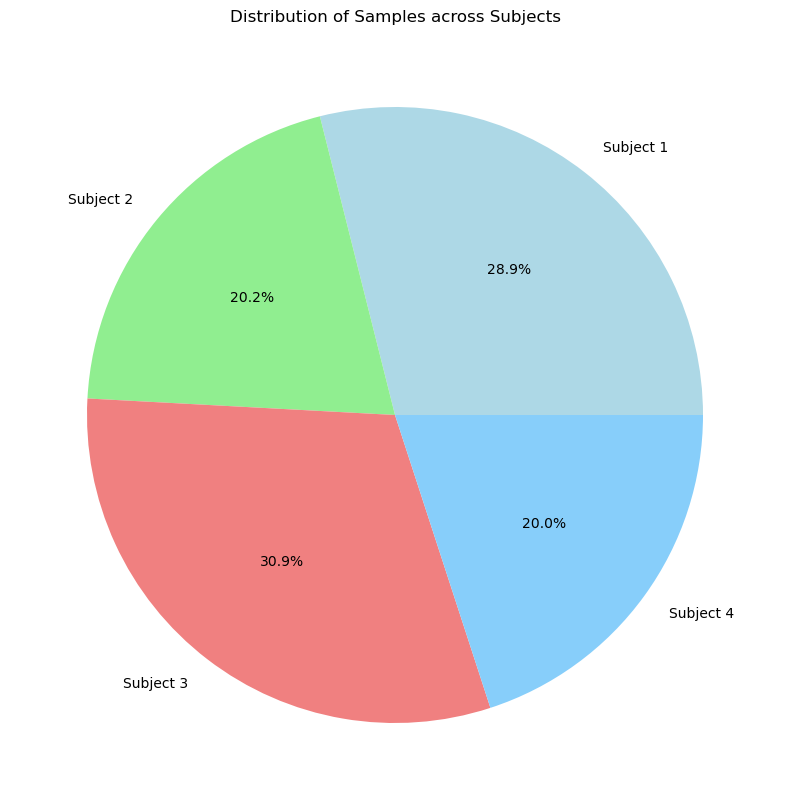

In [4]:
# create a pie chart of total samples in each dataset

plt.figure(figsize=(10, 10))
total = [len(one), len(two), len(three), len(four)]
labels = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
plt.pie(total, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Samples across Subjects')


#  save the pie chart
plt.savefig('plots/1. pie_chart.png')

plt.show()

Text(0.5, 80.7222222222222, 'Count')

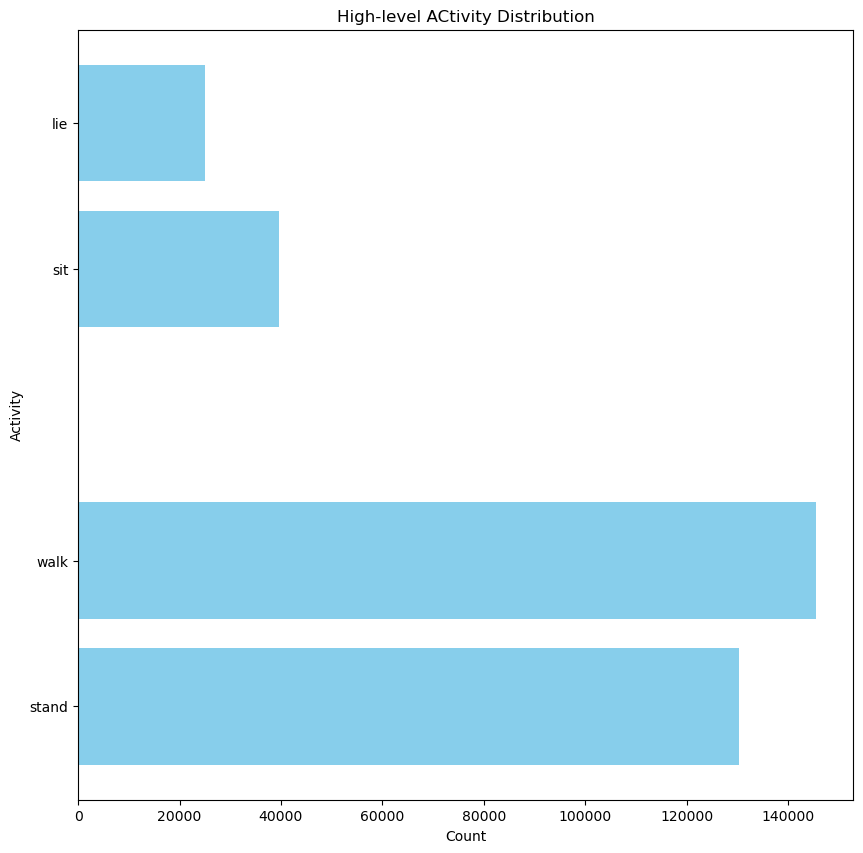

In [5]:
# draw a stacked bar chart of the distinct Locomotion count in each dataset
plt.figure(figsize=(10, 10))
locomotion = pd.concat([one['Locomotion'], two['Locomotion'], three['Locomotion'], four['Locomotion']], axis=0)
locomotion = locomotion.value_counts()
locomotion = locomotion.reset_index()
locomotion.columns = ['Locomotion', 'Count']
locomotion = locomotion.sort_values(by='Count', ascending=False)
locomotion = locomotion.reset_index(drop=True)
locomotion = locomotion.head(10)
locomotion = locomotion.sort_values(by='Count', ascending=True)
plt.barh(locomotion['Locomotion'], locomotion['Count'], color='skyblue')
plt.title('High-level ACtivity Distribution')
plt.ylabel('Activity')
plt.yticks([1, 2, 4, 5], ['stand', 'walk', 'sit', 'lie'])

# save the bar chart
plt.savefig('plots/2. bar_chart.png')

plt.xlabel('Count')

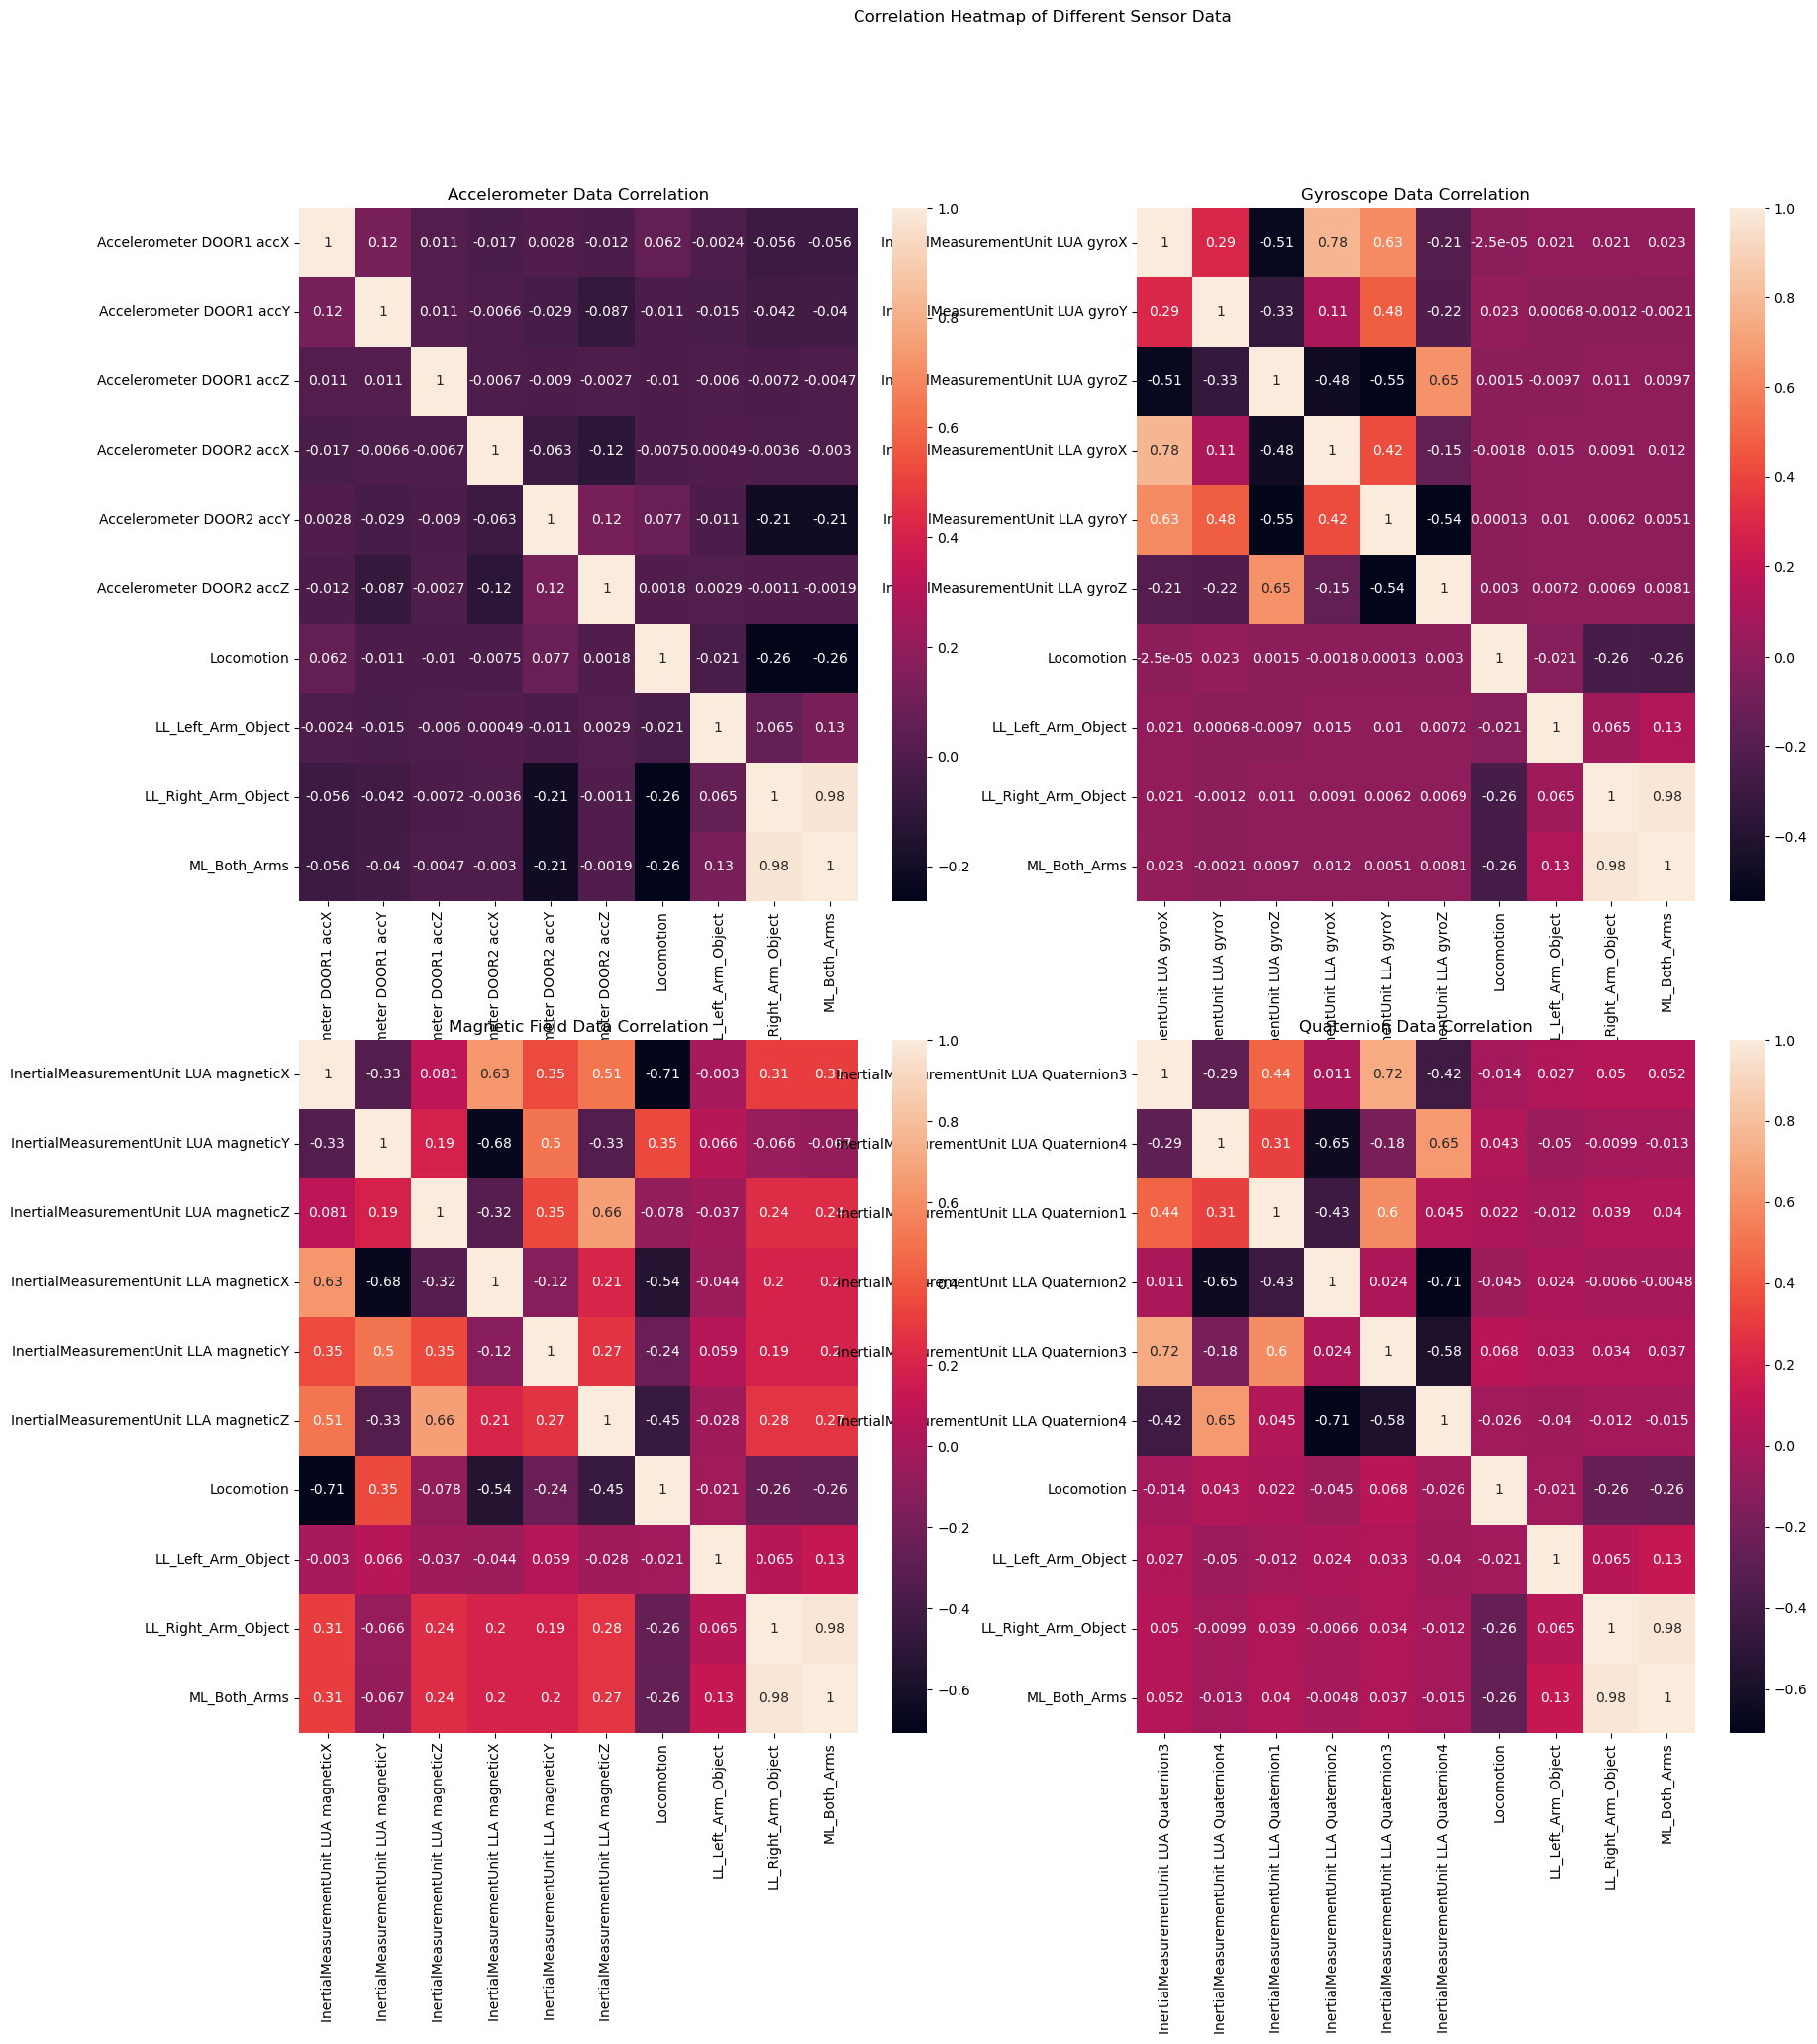

In [12]:
# list columns that contain acc in their names
data = pd.concat([one, two, three, four], axis=0)
acc_cols = [col for col in data.columns if 'acc' in col]
acc_cols = acc_cols[-6:]
# add last 4 columns to the list
acc_cols.extend(data.columns[-4:])

# list columns that contain gyro in their names
gyro_cols = [col for col in data.columns if 'gyro' in col]
# add last 4 columns to the list
gyro_cols = gyro_cols[-6:]
gyro_cols.extend(data.columns[-4:])

# list columns that contain mag in their names
mag_cols = [col for col in data.columns if 'magnetic' in col]
mag_cols = mag_cols[-6:]
# add last 4 columns to the list
mag_cols.extend(data.columns[-4:])

# list columns that contain Quaternion in their names
quat_cols = [col for col in data.columns if 'Quaternion' in col]
quat_cols = quat_cols[-6:]
# add last 4 columns to the list
quat_cols.extend(data.columns[-4:])

data = pd.concat([one, two, three, four], axis=0)

# plot the heatmap of the correlation matrix of 4 differnet columns inside on subplot
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.heatmap(data[acc_cols].corr(), annot=True, ax=ax[0, 0])
ax[0, 0].set_title('Accelerometer Data Correlation')

sns.heatmap(data[gyro_cols].corr(), annot=True, ax=ax[0, 1])
ax[0, 1].set_title('Gyroscope Data Correlation')

sns.heatmap(data[mag_cols].corr(), annot=True, ax=ax[1, 0])
ax[1, 0].set_title('Magnetic Field Data Correlation')

sns.heatmap(data[quat_cols].corr(), annot=True, ax=ax[1, 1])
ax[1, 1].set_title('Quaternion Data Correlation')

#plot title
plt.suptitle('Correlation Heatmap of Different Sensor Data')

# save the heatmap
plt.savefig('plots/3.1. heatmap.png')

plt.show()

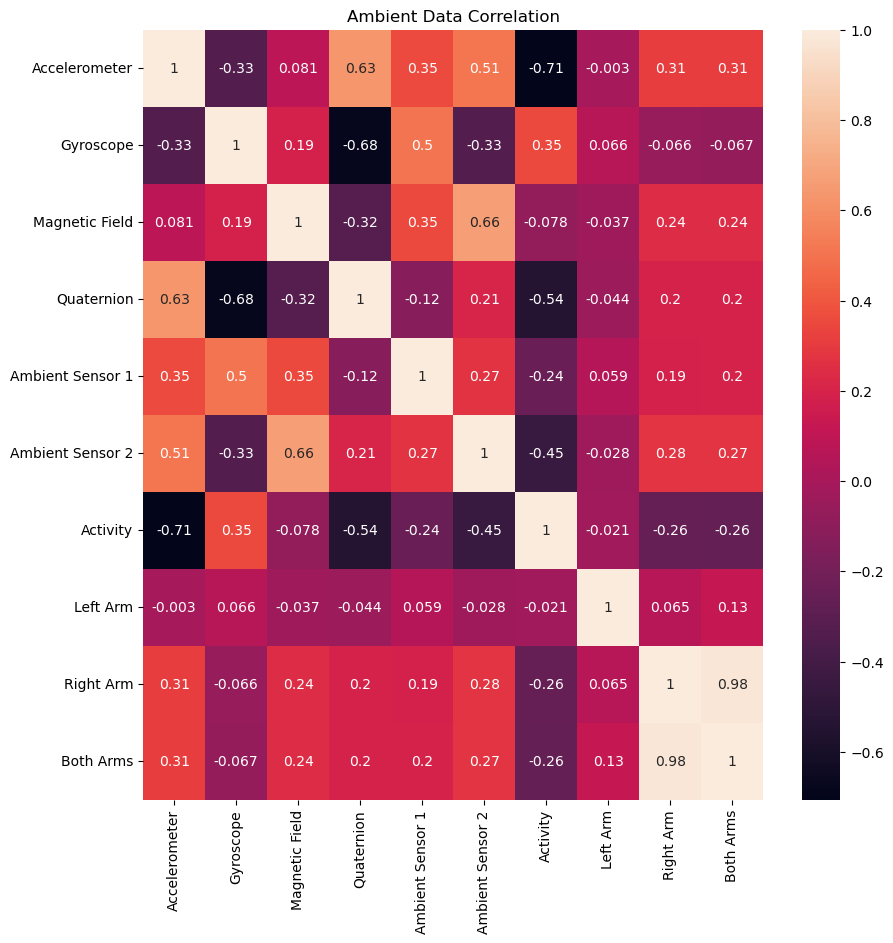

In [20]:
temp = data[mag_cols]
temp.columns = ['Accelerometer', 'Gyroscope', 'Magnetic Field', 'Quaternion', 'Ambient Sensor 1', 'Ambient Sensor 2', 'Activity', 'Left Arm', 'Right Arm', 'Both Arms']
plt.figure(figsize=(10, 10))
sns.heatmap(temp.corr(), annot=True,).set_title('Magnetic Field Data Correlation with Output')
plt.title('Ambient Data Correlation')
plt.savefig('plots/3.1. heatmap.png')
plt.show()